In [1]:
from typing import List

from dataset import UserGraphDataset
from dataset_in_memory import fetch_question_ids
from hetero_GAT import HeteroGAT
import torch
import re
import os

2023-03-31 10:06:42 INFO     PostEmbedding instantiated!


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [2]:
# Load model (EXP 1)
model = HeteroGAT(64, 2, 3)
model.load_state_dict(torch.load('../models/qa_40e_64h_3l.pt', map_location=torch.device('cpu')))
model.eval()

RuntimeError: Error(s) in loading state_dict for HeteroGAT:
	Missing key(s) in state_dict: "convs.0.convs.tag__describes__question.att", "convs.0.convs.tag__describes__question.lin_l.weight", "convs.0.convs.tag__describes__question.lin_l.bias", "convs.0.convs.tag__describes__question.lin_r.weight", "convs.0.convs.tag__describes__question.lin_r.bias", "convs.0.convs.tag__describes__answer.att", "convs.0.convs.tag__describes__answer.lin_l.weight", "convs.0.convs.tag__describes__answer.lin_l.bias", "convs.0.convs.tag__describes__answer.lin_r.weight", "convs.0.convs.tag__describes__answer.lin_r.bias", "convs.0.convs.tag__describes__comment.att", "convs.0.convs.tag__describes__comment.lin_l.weight", "convs.0.convs.tag__describes__comment.lin_l.bias", "convs.0.convs.tag__describes__comment.lin_r.weight", "convs.0.convs.tag__describes__comment.lin_r.bias", "convs.0.convs.module__imported_in__question.att", "convs.0.convs.module__imported_in__question.lin_l.weight", "convs.0.convs.module__imported_in__question.lin_l.bias", "convs.0.convs.module__imported_in__question.lin_r.weight", "convs.0.convs.module__imported_in__question.lin_r.bias", "convs.0.convs.module__imported_in__answer.att", "convs.0.convs.module__imported_in__answer.lin_l.weight", "convs.0.convs.module__imported_in__answer.lin_l.bias", "convs.0.convs.module__imported_in__answer.lin_r.weight", "convs.0.convs.module__imported_in__answer.lin_r.bias", "convs.0.convs.question__rev_describes__tag.att", "convs.0.convs.question__rev_describes__tag.lin_l.weight", "convs.0.convs.question__rev_describes__tag.lin_l.bias", "convs.0.convs.question__rev_describes__tag.lin_r.weight", "convs.0.convs.question__rev_describes__tag.lin_r.bias", "convs.0.convs.answer__rev_describes__tag.att", "convs.0.convs.answer__rev_describes__tag.lin_l.weight", "convs.0.convs.answer__rev_describes__tag.lin_l.bias", "convs.0.convs.answer__rev_describes__tag.lin_r.weight", "convs.0.convs.answer__rev_describes__tag.lin_r.bias", "convs.0.convs.comment__rev_describes__tag.att", "convs.0.convs.comment__rev_describes__tag.lin_l.weight", "convs.0.convs.comment__rev_describes__tag.lin_l.bias", "convs.0.convs.comment__rev_describes__tag.lin_r.weight", "convs.0.convs.comment__rev_describes__tag.lin_r.bias", "convs.0.convs.question__rev_imported_in__module.att", "convs.0.convs.question__rev_imported_in__module.lin_l.weight", "convs.0.convs.question__rev_imported_in__module.lin_l.bias", "convs.0.convs.question__rev_imported_in__module.lin_r.weight", "convs.0.convs.question__rev_imported_in__module.lin_r.bias", "convs.0.convs.answer__rev_imported_in__module.att", "convs.0.convs.answer__rev_imported_in__module.lin_l.weight", "convs.0.convs.answer__rev_imported_in__module.lin_l.bias", "convs.0.convs.answer__rev_imported_in__module.lin_r.weight", "convs.0.convs.answer__rev_imported_in__module.lin_r.bias", "convs.1.convs.tag__describes__question.att", "convs.1.convs.tag__describes__question.lin_l.weight", "convs.1.convs.tag__describes__question.lin_l.bias", "convs.1.convs.tag__describes__question.lin_r.weight", "convs.1.convs.tag__describes__question.lin_r.bias", "convs.1.convs.tag__describes__answer.att", "convs.1.convs.tag__describes__answer.lin_l.weight", "convs.1.convs.tag__describes__answer.lin_l.bias", "convs.1.convs.tag__describes__answer.lin_r.weight", "convs.1.convs.tag__describes__answer.lin_r.bias", "convs.1.convs.tag__describes__comment.att", "convs.1.convs.tag__describes__comment.lin_l.weight", "convs.1.convs.tag__describes__comment.lin_l.bias", "convs.1.convs.tag__describes__comment.lin_r.weight", "convs.1.convs.tag__describes__comment.lin_r.bias", "convs.1.convs.module__imported_in__question.att", "convs.1.convs.module__imported_in__question.lin_l.weight", "convs.1.convs.module__imported_in__question.lin_l.bias", "convs.1.convs.module__imported_in__question.lin_r.weight", "convs.1.convs.module__imported_in__question.lin_r.bias", "convs.1.convs.module__imported_in__answer.att", "convs.1.convs.module__imported_in__answer.lin_l.weight", "convs.1.convs.module__imported_in__answer.lin_l.bias", "convs.1.convs.module__imported_in__answer.lin_r.weight", "convs.1.convs.module__imported_in__answer.lin_r.bias", "convs.1.convs.question__rev_describes__tag.att", "convs.1.convs.question__rev_describes__tag.lin_l.weight", "convs.1.convs.question__rev_describes__tag.lin_l.bias", "convs.1.convs.question__rev_describes__tag.lin_r.weight", "convs.1.convs.question__rev_describes__tag.lin_r.bias", "convs.1.convs.answer__rev_describes__tag.att", "convs.1.convs.answer__rev_describes__tag.lin_l.weight", "convs.1.convs.answer__rev_describes__tag.lin_l.bias", "convs.1.convs.answer__rev_describes__tag.lin_r.weight", "convs.1.convs.answer__rev_describes__tag.lin_r.bias", "convs.1.convs.comment__rev_describes__tag.att", "convs.1.convs.comment__rev_describes__tag.lin_l.weight", "convs.1.convs.comment__rev_describes__tag.lin_l.bias", "convs.1.convs.comment__rev_describes__tag.lin_r.weight", "convs.1.convs.comment__rev_describes__tag.lin_r.bias", "convs.1.convs.question__rev_imported_in__module.att", "convs.1.convs.question__rev_imported_in__module.lin_l.weight", "convs.1.convs.question__rev_imported_in__module.lin_l.bias", "convs.1.convs.question__rev_imported_in__module.lin_r.weight", "convs.1.convs.question__rev_imported_in__module.lin_r.bias", "convs.1.convs.answer__rev_imported_in__module.att", "convs.1.convs.answer__rev_imported_in__module.lin_l.weight", "convs.1.convs.answer__rev_imported_in__module.lin_l.bias", "convs.1.convs.answer__rev_imported_in__module.lin_r.weight", "convs.1.convs.answer__rev_imported_in__module.lin_r.bias", "convs.2.convs.tag__describes__question.att", "convs.2.convs.tag__describes__question.lin_l.weight", "convs.2.convs.tag__describes__question.lin_l.bias", "convs.2.convs.tag__describes__question.lin_r.weight", "convs.2.convs.tag__describes__question.lin_r.bias", "convs.2.convs.tag__describes__answer.att", "convs.2.convs.tag__describes__answer.lin_l.weight", "convs.2.convs.tag__describes__answer.lin_l.bias", "convs.2.convs.tag__describes__answer.lin_r.weight", "convs.2.convs.tag__describes__answer.lin_r.bias", "convs.2.convs.tag__describes__comment.att", "convs.2.convs.tag__describes__comment.lin_l.weight", "convs.2.convs.tag__describes__comment.lin_l.bias", "convs.2.convs.tag__describes__comment.lin_r.weight", "convs.2.convs.tag__describes__comment.lin_r.bias", "convs.2.convs.module__imported_in__question.att", "convs.2.convs.module__imported_in__question.lin_l.weight", "convs.2.convs.module__imported_in__question.lin_l.bias", "convs.2.convs.module__imported_in__question.lin_r.weight", "convs.2.convs.module__imported_in__question.lin_r.bias", "convs.2.convs.module__imported_in__answer.att", "convs.2.convs.module__imported_in__answer.lin_l.weight", "convs.2.convs.module__imported_in__answer.lin_l.bias", "convs.2.convs.module__imported_in__answer.lin_r.weight", "convs.2.convs.module__imported_in__answer.lin_r.bias", "convs.2.convs.question__rev_describes__tag.att", "convs.2.convs.question__rev_describes__tag.lin_l.weight", "convs.2.convs.question__rev_describes__tag.lin_l.bias", "convs.2.convs.question__rev_describes__tag.lin_r.weight", "convs.2.convs.question__rev_describes__tag.lin_r.bias", "convs.2.convs.answer__rev_describes__tag.att", "convs.2.convs.answer__rev_describes__tag.lin_l.weight", "convs.2.convs.answer__rev_describes__tag.lin_l.bias", "convs.2.convs.answer__rev_describes__tag.lin_r.weight", "convs.2.convs.answer__rev_describes__tag.lin_r.bias", "convs.2.convs.comment__rev_describes__tag.att", "convs.2.convs.comment__rev_describes__tag.lin_l.weight", "convs.2.convs.comment__rev_describes__tag.lin_l.bias", "convs.2.convs.comment__rev_describes__tag.lin_r.weight", "convs.2.convs.comment__rev_describes__tag.lin_r.bias", "convs.2.convs.question__rev_imported_in__module.att", "convs.2.convs.question__rev_imported_in__module.lin_l.weight", "convs.2.convs.question__rev_imported_in__module.lin_l.bias", "convs.2.convs.question__rev_imported_in__module.lin_r.weight", "convs.2.convs.question__rev_imported_in__module.lin_r.bias", "convs.2.convs.answer__rev_imported_in__module.att", "convs.2.convs.answer__rev_imported_in__module.lin_l.weight", "convs.2.convs.answer__rev_imported_in__module.lin_l.bias", "convs.2.convs.answer__rev_imported_in__module.lin_r.weight", "convs.2.convs.answer__rev_imported_in__module.lin_r.bias". 
	Unexpected key(s) in state_dict: "convs.0.convs.tag__describes__question.att_src", "convs.0.convs.tag__describes__question.att_dst", "convs.0.convs.tag__describes__question.lin_src.weight", "convs.0.convs.tag__describes__question.lin_dst.weight", "convs.0.convs.tag__describes__answer.att_src", "convs.0.convs.tag__describes__answer.att_dst", "convs.0.convs.tag__describes__answer.lin_src.weight", "convs.0.convs.tag__describes__answer.lin_dst.weight", "convs.0.convs.tag__describes__comment.att_src", "convs.0.convs.tag__describes__comment.att_dst", "convs.0.convs.tag__describes__comment.lin_src.weight", "convs.0.convs.tag__describes__comment.lin_dst.weight", "convs.0.convs.module__imported_in__question.att_src", "convs.0.convs.module__imported_in__question.att_dst", "convs.0.convs.module__imported_in__question.lin_src.weight", "convs.0.convs.module__imported_in__question.lin_dst.weight", "convs.0.convs.module__imported_in__answer.att_src", "convs.0.convs.module__imported_in__answer.att_dst", "convs.0.convs.module__imported_in__answer.lin_src.weight", "convs.0.convs.module__imported_in__answer.lin_dst.weight", "convs.0.convs.question__rev_describes__tag.att_src", "convs.0.convs.question__rev_describes__tag.att_dst", "convs.0.convs.question__rev_describes__tag.lin_src.weight", "convs.0.convs.question__rev_describes__tag.lin_dst.weight", "convs.0.convs.answer__rev_describes__tag.att_src", "convs.0.convs.answer__rev_describes__tag.att_dst", "convs.0.convs.answer__rev_describes__tag.lin_src.weight", "convs.0.convs.answer__rev_describes__tag.lin_dst.weight", "convs.0.convs.comment__rev_describes__tag.att_src", "convs.0.convs.comment__rev_describes__tag.att_dst", "convs.0.convs.comment__rev_describes__tag.lin_src.weight", "convs.0.convs.comment__rev_describes__tag.lin_dst.weight", "convs.0.convs.question__rev_imported_in__module.att_src", "convs.0.convs.question__rev_imported_in__module.att_dst", "convs.0.convs.question__rev_imported_in__module.lin_src.weight", "convs.0.convs.question__rev_imported_in__module.lin_dst.weight", "convs.0.convs.answer__rev_imported_in__module.att_src", "convs.0.convs.answer__rev_imported_in__module.att_dst", "convs.0.convs.answer__rev_imported_in__module.lin_src.weight", "convs.0.convs.answer__rev_imported_in__module.lin_dst.weight", "convs.1.convs.tag__describes__question.att_src", "convs.1.convs.tag__describes__question.att_dst", "convs.1.convs.tag__describes__question.lin_src.weight", "convs.1.convs.tag__describes__question.lin_dst.weight", "convs.1.convs.tag__describes__answer.att_src", "convs.1.convs.tag__describes__answer.att_dst", "convs.1.convs.tag__describes__answer.lin_src.weight", "convs.1.convs.tag__describes__answer.lin_dst.weight", "convs.1.convs.tag__describes__comment.att_src", "convs.1.convs.tag__describes__comment.att_dst", "convs.1.convs.tag__describes__comment.lin_src.weight", "convs.1.convs.tag__describes__comment.lin_dst.weight", "convs.1.convs.module__imported_in__question.att_src", "convs.1.convs.module__imported_in__question.att_dst", "convs.1.convs.module__imported_in__question.lin_src.weight", "convs.1.convs.module__imported_in__question.lin_dst.weight", "convs.1.convs.module__imported_in__answer.att_src", "convs.1.convs.module__imported_in__answer.att_dst", "convs.1.convs.module__imported_in__answer.lin_src.weight", "convs.1.convs.module__imported_in__answer.lin_dst.weight", "convs.1.convs.question__rev_describes__tag.att_src", "convs.1.convs.question__rev_describes__tag.att_dst", "convs.1.convs.question__rev_describes__tag.lin_src.weight", "convs.1.convs.question__rev_describes__tag.lin_dst.weight", "convs.1.convs.answer__rev_describes__tag.att_src", "convs.1.convs.answer__rev_describes__tag.att_dst", "convs.1.convs.answer__rev_describes__tag.lin_src.weight", "convs.1.convs.answer__rev_describes__tag.lin_dst.weight", "convs.1.convs.comment__rev_describes__tag.att_src", "convs.1.convs.comment__rev_describes__tag.att_dst", "convs.1.convs.comment__rev_describes__tag.lin_src.weight", "convs.1.convs.comment__rev_describes__tag.lin_dst.weight", "convs.1.convs.question__rev_imported_in__module.att_src", "convs.1.convs.question__rev_imported_in__module.att_dst", "convs.1.convs.question__rev_imported_in__module.lin_src.weight", "convs.1.convs.question__rev_imported_in__module.lin_dst.weight", "convs.1.convs.answer__rev_imported_in__module.att_src", "convs.1.convs.answer__rev_imported_in__module.att_dst", "convs.1.convs.answer__rev_imported_in__module.lin_src.weight", "convs.1.convs.answer__rev_imported_in__module.lin_dst.weight", "convs.2.convs.tag__describes__question.att_src", "convs.2.convs.tag__describes__question.att_dst", "convs.2.convs.tag__describes__question.lin_src.weight", "convs.2.convs.tag__describes__question.lin_dst.weight", "convs.2.convs.tag__describes__answer.att_src", "convs.2.convs.tag__describes__answer.att_dst", "convs.2.convs.tag__describes__answer.lin_src.weight", "convs.2.convs.tag__describes__answer.lin_dst.weight", "convs.2.convs.tag__describes__comment.att_src", "convs.2.convs.tag__describes__comment.att_dst", "convs.2.convs.tag__describes__comment.lin_src.weight", "convs.2.convs.tag__describes__comment.lin_dst.weight", "convs.2.convs.module__imported_in__question.att_src", "convs.2.convs.module__imported_in__question.att_dst", "convs.2.convs.module__imported_in__question.lin_src.weight", "convs.2.convs.module__imported_in__question.lin_dst.weight", "convs.2.convs.module__imported_in__answer.att_src", "convs.2.convs.module__imported_in__answer.att_dst", "convs.2.convs.module__imported_in__answer.lin_src.weight", "convs.2.convs.module__imported_in__answer.lin_dst.weight", "convs.2.convs.question__rev_describes__tag.att_src", "convs.2.convs.question__rev_describes__tag.att_dst", "convs.2.convs.question__rev_describes__tag.lin_src.weight", "convs.2.convs.question__rev_describes__tag.lin_dst.weight", "convs.2.convs.answer__rev_describes__tag.att_src", "convs.2.convs.answer__rev_describes__tag.att_dst", "convs.2.convs.answer__rev_describes__tag.lin_src.weight", "convs.2.convs.answer__rev_describes__tag.lin_dst.weight", "convs.2.convs.comment__rev_describes__tag.att_src", "convs.2.convs.comment__rev_describes__tag.att_dst", "convs.2.convs.comment__rev_describes__tag.lin_src.weight", "convs.2.convs.comment__rev_describes__tag.lin_dst.weight", "convs.2.convs.question__rev_imported_in__module.att_src", "convs.2.convs.question__rev_imported_in__module.att_dst", "convs.2.convs.question__rev_imported_in__module.lin_src.weight", "convs.2.convs.question__rev_imported_in__module.lin_dst.weight", "convs.2.convs.answer__rev_imported_in__module.att_src", "convs.2.convs.answer__rev_imported_in__module.att_dst", "convs.2.convs.answer__rev_imported_in__module.lin_src.weight", "convs.2.convs.answer__rev_imported_in__module.lin_dst.weight". 
	size mismatch for convs.0.convs.tag__describes__question.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for convs.0.convs.tag__describes__answer.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for convs.0.convs.tag__describes__comment.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for convs.0.convs.module__imported_in__question.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for convs.0.convs.module__imported_in__answer.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for convs.0.convs.question__rev_describes__tag.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for convs.0.convs.answer__rev_describes__tag.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for convs.0.convs.comment__rev_describes__tag.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for convs.0.convs.question__rev_imported_in__module.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for convs.0.convs.answer__rev_imported_in__module.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for convs.1.convs.tag__describes__question.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for convs.1.convs.tag__describes__answer.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for convs.1.convs.tag__describes__comment.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for convs.1.convs.module__imported_in__question.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for convs.1.convs.module__imported_in__answer.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for convs.1.convs.question__rev_describes__tag.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for convs.1.convs.answer__rev_describes__tag.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for convs.1.convs.comment__rev_describes__tag.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for convs.1.convs.question__rev_imported_in__module.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for convs.1.convs.answer__rev_imported_in__module.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for convs.2.convs.tag__describes__question.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for convs.2.convs.tag__describes__answer.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for convs.2.convs.tag__describes__comment.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for convs.2.convs.module__imported_in__question.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for convs.2.convs.module__imported_in__answer.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for convs.2.convs.question__rev_describes__tag.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for convs.2.convs.answer__rev_describes__tag.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for convs.2.convs.comment__rev_describes__tag.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for convs.2.convs.question__rev_imported_in__module.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for convs.2.convs.answer__rev_imported_in__module.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([384]).
	size mismatch for lin1.weight: copying a param with shape torch.Size([2, 3392]) from checkpoint, the shape in current model is torch.Size([64, 3392]).
	size mismatch for lin1.bias: copying a param with shape torch.Size([2]) from checkpoint, the shape in current model is torch.Size([64]).

In [3]:
question_ids = fetch_question_ids("../data")
train_ids = list(question_ids)[:int(len(question_ids) * 0.7)]
test_ids = [x for x in question_ids if x not in train_ids]
# Instantiate the dataset class for access to database
ugd = UserGraphDataset(root='../data/', db_address='../stackoverflow.db', skip_processing=True)

2023-03-30 15:46:34 INFO     PostEmbedding instantiated!


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
def fetch_answer_files(question_id: int):
    for f in os.listdir('../data/processed/'):
        question_id_search = re.search(r"id_(\d+)", f)
        if question_id_search:
            if int(question_id_search.group(1)) == question_id:
                yield torch.load(os.path.join('../data/processed/', f))

In [5]:
"""
TODO:
For each question-answer pair, predict, and measure distribution of topic tags for each answer.
This will be used to identify topics which the model is most confident about.
"""

'\nTODO:\nFor each question-answer pair, predict, and measure distribution of topic tags for each answer.\nThis will be used to identify topics which the model is most confident about.\n'

In [6]:
from torch_geometric.loader import DataLoader

correct_tag_count = {}
incorrect_tag_count = {}

tag_predictions = {}

for i in test_ids[:500]:
    graph_files = list(fetch_answer_files(i))
    dataloader = DataLoader(graph_files, batch_size=1, shuffle=False)

    # Fetch tags for question
    tags = [x for x in ugd.fetch_tags_for_question(i) if x != 'python']

    for answer, graph in zip(ugd.fetch_answers_for_question(i).itertuples(), dataloader):

        post_emb = torch.cat([graph.question_emb, graph.answer_emb], dim=1)
        out = model(graph.x_dict, graph.edge_index_dict, graph.batch_dict, post_emb)  # Perform a single forward pass.
        pred = out.argmax(dim=1)  # Use the class with highest probability.


        if len(tags) == 0:
            tags = ['python']

        for tag in tags:
            if tag not in tag_predictions:
                tag_predictions[tag] = ([pred.item()], [graph.label.item()])
            else:
                tag_predictions[tag][0].append(pred.item())
                tag_predictions[tag][1].append(graph.label.item())

            if pred == graph.label:
                if tag in correct_tag_count:
                    correct_tag_count[tag] += 1
                else:
                    correct_tag_count[tag] = 1
            else:
                if tag in incorrect_tag_count:
                    incorrect_tag_count[tag] += 1
                else:
                    incorrect_tag_count[tag] = 1



In [7]:
correct_tag_count

{'datetime': 29,
 'strptime': 9,
 'user-interface': 31,
 'qt': 3,
 'pyqt': 18,
 'easy-install': 10,
 'pip': 9,
 'python': 188,
 'django': 158,
 'django-models': 20,
 'django-managers': 4,
 'list': 155,
 'multithreading': 20,
 'unit-testing': 6,
 'exception': 27,
 'tuples': 3,
 'redirect': 10,
 'stderr': 7,
 'sql': 13,
 'django-queryset': 5,
 'django-aggregation': 2,
 'git': 3,
 'githooks': 3,
 'random': 10,
 'lisp': 4,
 'clojure': 4,
 'idioms': 26,
 'coding-style': 20,
 'conventions': 4,
 'algorithm': 78,
 'sorting': 37,
 'file': 64,
 'loops': 23,
 'subprocess': 79,
 'stdout': 14,
 'popen': 11,
 'sqlalchemy': 26,
 'insert': 2,
 'portability': 13,
 'java': 35,
 'ruby': 47,
 'cross-platform': 9,
 'string': 116,
 'path': 54,
 'logging': 41,
 'amazon-web-services': 8,
 'boto': 13,
 'wxpython': 11,
 'distribution': 6,
 'freeze': 6,
 'c++': 36,
 'swfupload': 2,
 'split': 22,
 'text-segmentation': 7,
 'pypi': 9,
 'garbage-collection': 5,
 'attributes': 3,
 'object': 24,
 'python-3.x': 24,
 'c

In [8]:
incorrect_tag_count

{'datetime': 10,
 'strptime': 1,
 'user-interface': 9,
 'qt': 6,
 'pyqt': 8,
 'python': 69,
 'list': 56,
 'multithreading': 4,
 'unit-testing': 2,
 'exception': 9,
 'django': 61,
 'redirect': 4,
 'stderr': 2,
 'lisp': 4,
 'clojure': 4,
 'idioms': 21,
 'algorithm': 37,
 'sorting': 9,
 'subprocess': 8,
 'stdout': 2,
 'popen': 4,
 'portability': 1,
 'file': 25,
 'java': 12,
 'ruby': 12,
 'cross-platform': 2,
 'string': 43,
 'path': 20,
 'logging': 13,
 'amazon-web-services': 1,
 'boto': 2,
 'wxpython': 1,
 'distribution': 1,
 'freeze': 1,
 'c++': 16,
 'swfupload': 1,
 'split': 7,
 'text-segmentation': 2,
 'pypi': 1,
 'garbage-collection': 1,
 'attributes': 2,
 'object': 13,
 'python-3.x': 6,
 'character': 1,
 'numpy': 12,
 'scipy': 12,
 'statistics': 5,
 'posix': 2,
 'django-templates': 5,
 'apache': 4,
 'cgi': 4,
 'recursion': 5,
 'lambda': 5,
 'y-combinator': 4,
 'url': 11,
 'uuid': 3,
 'tinyurl': 2,
 'short-url': 2,
 'windows': 23,
 'linux': 17,
 'preferences': 4,
 'c': 17,
 'refcounti

In [9]:
tag_predictions

{'datetime': ([1,
   1,
   1,
   1,
   0,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   1,
   1,
   1,
   1,
   1,
   0,
   1,
   1,
   1,
   0,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   1,
   0,
   1,
   1,
   0,
   1,
   1,
   1],
  [1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   1,
   0,
   0,
   1,
   1,
   1,
   1,
   0,
   1,
   1,
   1,
   0,
   1,
   1]),
 'strptime': ([1, 1, 1, 1, 0, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'user-interface': ([1,
   0,
   0,
   0,
   1,
   1,
   0,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   1,
   1,
   0,
   1,
   1,
   1,
   1,
   1,
   0,
   1,
   1,
   1,
   0,
   1,
   1,
   1,
   0,
   1,
   1,
   1,
   0,
   0,
   1,
   1,
   1],
  [1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   0,
   1,
   0,
   1,
   1,
   1,
   0,
   1,
   1,
   1,
   1,
   1,
   0,
   1,
   1,

In [10]:
from sklearn.metrics import f1_score, accuracy_score

rows = []

for tag, (true, labels) in tag_predictions.items():
    rows.append((tag, f1_score(true, labels, average='binary'), accuracy_score(true, labels), len(true) + len(labels)))

In [11]:
import pandas as pd
results = pd.DataFrame(rows, columns=['tag', 'f1', 'accuracy', 'count'])
results.sort_values(by='f1', ascending=False)

,tag,f1,accuracy,count
176,zsh,1.000000,1.0,4
167,time,1.000000,1.0,10
432,import,1.000000,1.0,2
433,console,1.000000,1.0,2
434,namespaces,1.000000,1.0,8
...,...,...,...,...
268,visual-c++,0.333333,0.2,10
117,timer,0.333333,0.2,10
65,apache,0.333333,0.5,16
66,cgi,0.333333,0.5,16


In [12]:
top_20 = results.sort_values(by='f1', ascending=False)[results['count'] > 15].head(20)
top_20

C:\Users\liamb\AppData\Local\Temp\ipykernel_15204\3198782478.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_20 = results.sort_values(by='f1', ascending=False)[results['count'] > 15].head(20)


,tag,f1,accuracy,count
236,xhtml,1.000000,1.000000,16
465,pickle,1.000000,1.000000,16
5,easy-install,1.000000,1.000000,20
222,naming-conventions,0.975610,0.954545,44
282,command,0.975207,0.951613,124
221,oop,0.974359,0.954545,44
223,identifier,0.967742,0.941176,34
450,simplejson,0.960000,0.923077,26
38,portability,0.960000,0.928571,28
281,terminal,0.960000,0.923077,130


In [13]:
bottom_20 = results.sort_values(by='f1', ascending=False)[results['count'] > 15].tail(20)
bottom_20

C:\Users\liamb\AppData\Local\Temp\ipykernel_15204\1442870573.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bottom_20 = results.sort_values(by='f1', ascending=False)[results['count'] > 15].tail(20)


,tag,f1,accuracy,count
284,python-imaging-library,0.648649,0.580645,62
87,performance,0.646154,0.510638,94
352,rounding,0.640000,0.550000,40
295,gmail,0.625000,0.500000,24
130,replace,0.615385,0.444444,18
24,lisp,0.600000,0.500000,16
25,clojure,0.600000,0.500000,16
202,large-files,0.600000,0.500000,16
76,preferences,0.600000,0.555556,18
460,fencepost,0.600000,0.515152,66


[Text(5, 0, '16'),
 Text(5, 0, '16'),
 Text(5, 0, '20'),
 Text(5, 0, '44'),
 Text(5, 0, '124'),
 Text(5, 0, '44'),
 Text(5, 0, '34'),
 Text(5, 0, '26'),
 Text(5, 0, '28'),
 Text(5, 0, '130'),
 Text(5, 0, '92'),
 Text(5, 0, '24'),
 Text(5, 0, '22'),
 Text(5, 0, '174'),
 Text(5, 0, '20'),
 Text(5, 0, '20'),
 Text(5, 0, '20'),
 Text(5, 0, '22'),
 Text(5, 0, '44'),
 Text(5, 0, '20')]

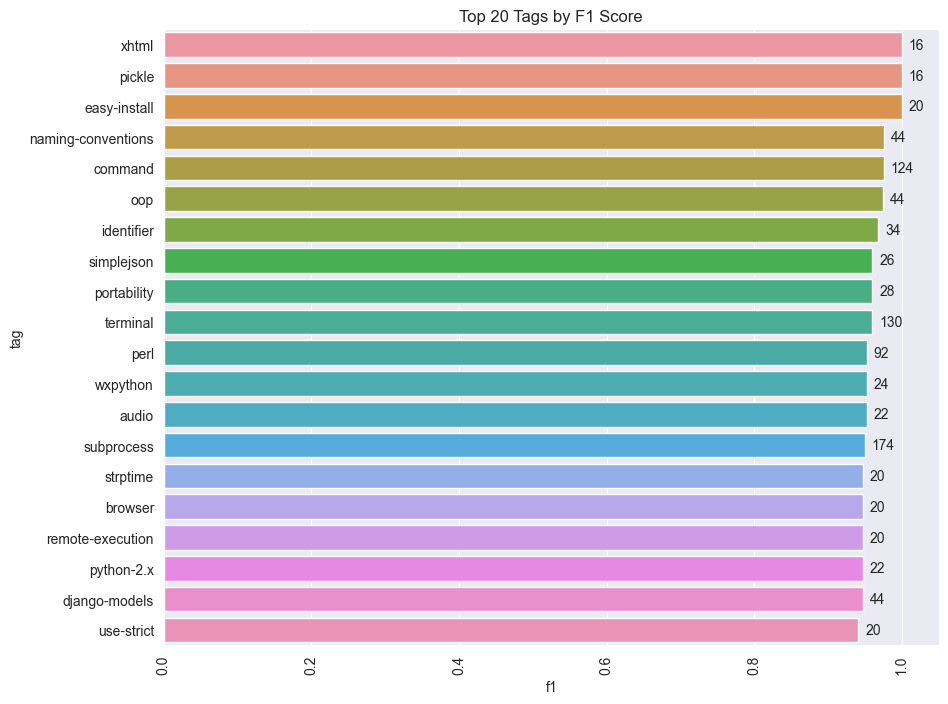

In [14]:
import seaborn as sns
sns.color_palette("muted")

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
ax = sns.barplot(y=top_20['tag'], x=top_20['f1'])
plt.xticks(rotation=90)
plt.title('Top 20 Tags by F1 Score')
# Label with counts
ax.bar_label(ax.containers[0], labels=top_20['count'], padding=5)

[Text(5, 0, '62'),
 Text(5, 0, '94'),
 Text(5, 0, '40'),
 Text(5, 0, '24'),
 Text(5, 0, '18'),
 Text(5, 0, '16'),
 Text(5, 0, '16'),
 Text(5, 0, '16'),
 Text(5, 0, '18'),
 Text(5, 0, '66'),
 Text(5, 0, '16'),
 Text(5, 0, '18'),
 Text(5, 0, '18'),
 Text(5, 0, '18'),
 Text(5, 0, '20'),
 Text(5, 0, '32'),
 Text(5, 0, '58'),
 Text(5, 0, '28'),
 Text(5, 0, '16'),
 Text(5, 0, '16')]

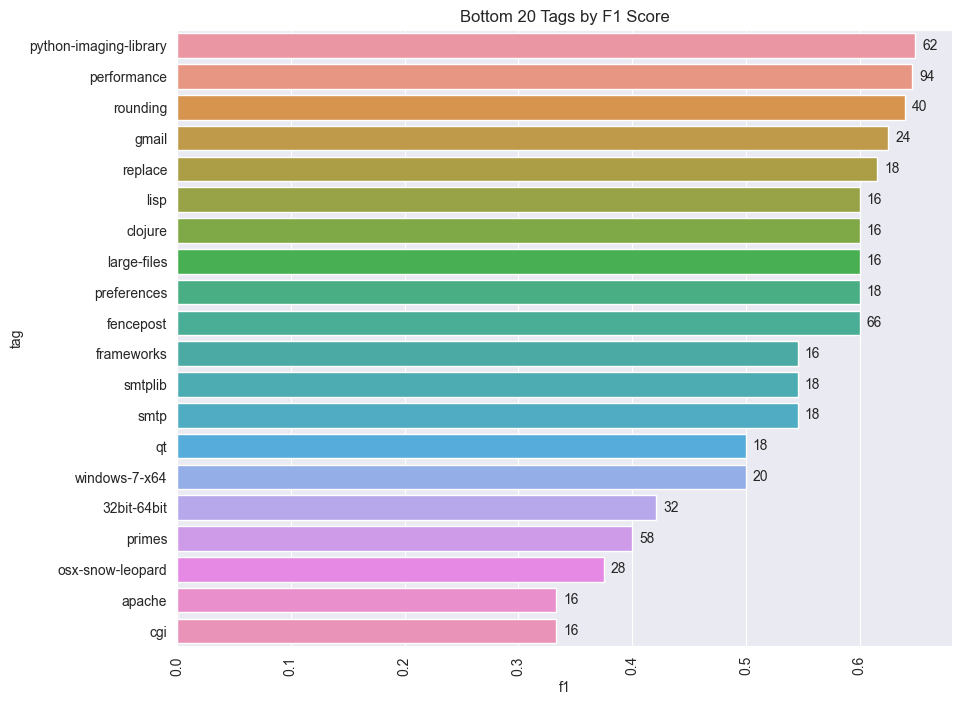

In [15]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(y=bottom_20['tag'], x=bottom_20['f1'])
plt.xticks(rotation=90)
plt.title('Bottom 20 Tags by F1 Score')
# Label with counts
ax.bar_label(ax.containers[0], labels=bottom_20['count'], padding=5)